The notebook aims to perform customer segmentation through clustering algorithms **KMeans** and **Hierarchial** methods.<br> Techniques utilised to determine the optimal number of clusters are **elbow threshold curve**, **silhouette coefficient** and **dendrogram threshold level**.<br> Tools like **StandardScaler** (to scale the features for KMeans model) and **MinMaxScaler** (to normalise the features for Hierarchial model) have been used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import squarify # Treemaps

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
    # Determine the number of clusters
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator 
    # Identifying the Knee in the Elbow Plot with KneeLocator function

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print('Number of records (rows) in the dataset:',df.shape[0])
print('Number of features (columns) in the dataset:',df.shape[1])
print('Duplicated Entries:', df.duplicated().sum())
print('Missing Values:')
print(df.isna().sum())

Number of records (rows) in the dataset: 200
Number of features (columns) in the dataset: 5
Duplicated Entries: 0
Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The dataset is clean since it has **no duplicate values** & **no missing values**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns = {'Annual Income (k$)': "Income", 'Spending Score (1-100)': 'SpendScore'}, inplace = True)
df = df.drop(columns = ['CustomerID'])
df.columns

Index(['Gender', 'Age', 'Income', 'SpendScore'], dtype='object')

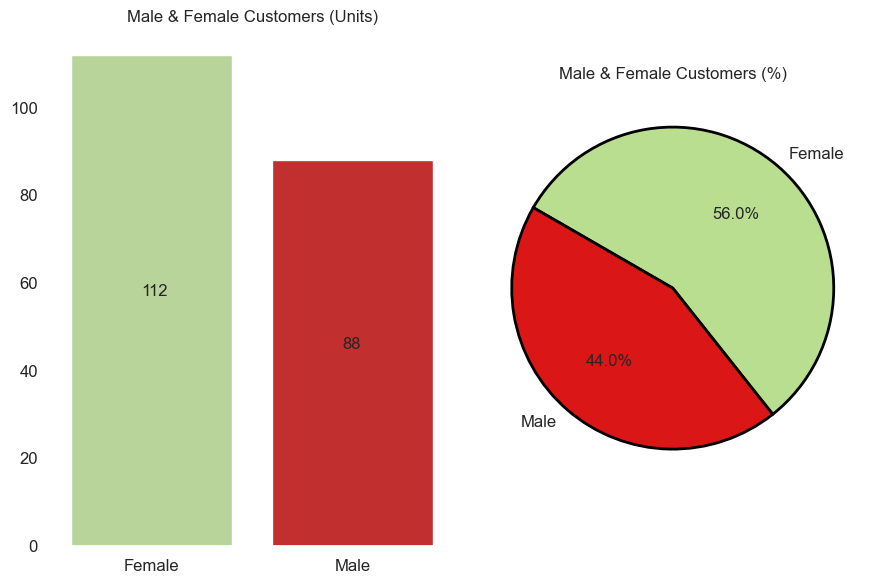

In [6]:
## Gender Analysis:
sns.set(rc = {'axes.facecolor': 'none', 'axes.grid': True, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.autolayout': True})
plt.subplots(figsize = (9, 6))
pal = ('#b9de90', '#DA1616')
my_xpl = [0.0, 0.08]

# Total Individuals in Gender:
plt.subplot(1, 2, 1)
plt.title('Male & Female Customers (Units)', fontsize = 12)
ax = sns.countplot(x = 'Gender', data = df, palette = pal, order = df['Gender'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, (p.get_height()+2)/2))
plt.xlabel(None)
plt.ylabel(None)

# Total Individuals by Gender (in %):
plt.subplot(1, 2, 2)
plt.title('Male & Female Customers (%)', fontsize = 12)
df['Gender'].value_counts().plot(kind='pie', colors= pal, legend=None, ylabel = '', counterclock = False, startangle = 150, wedgeprops = {'edgecolor': 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')
plt.show()

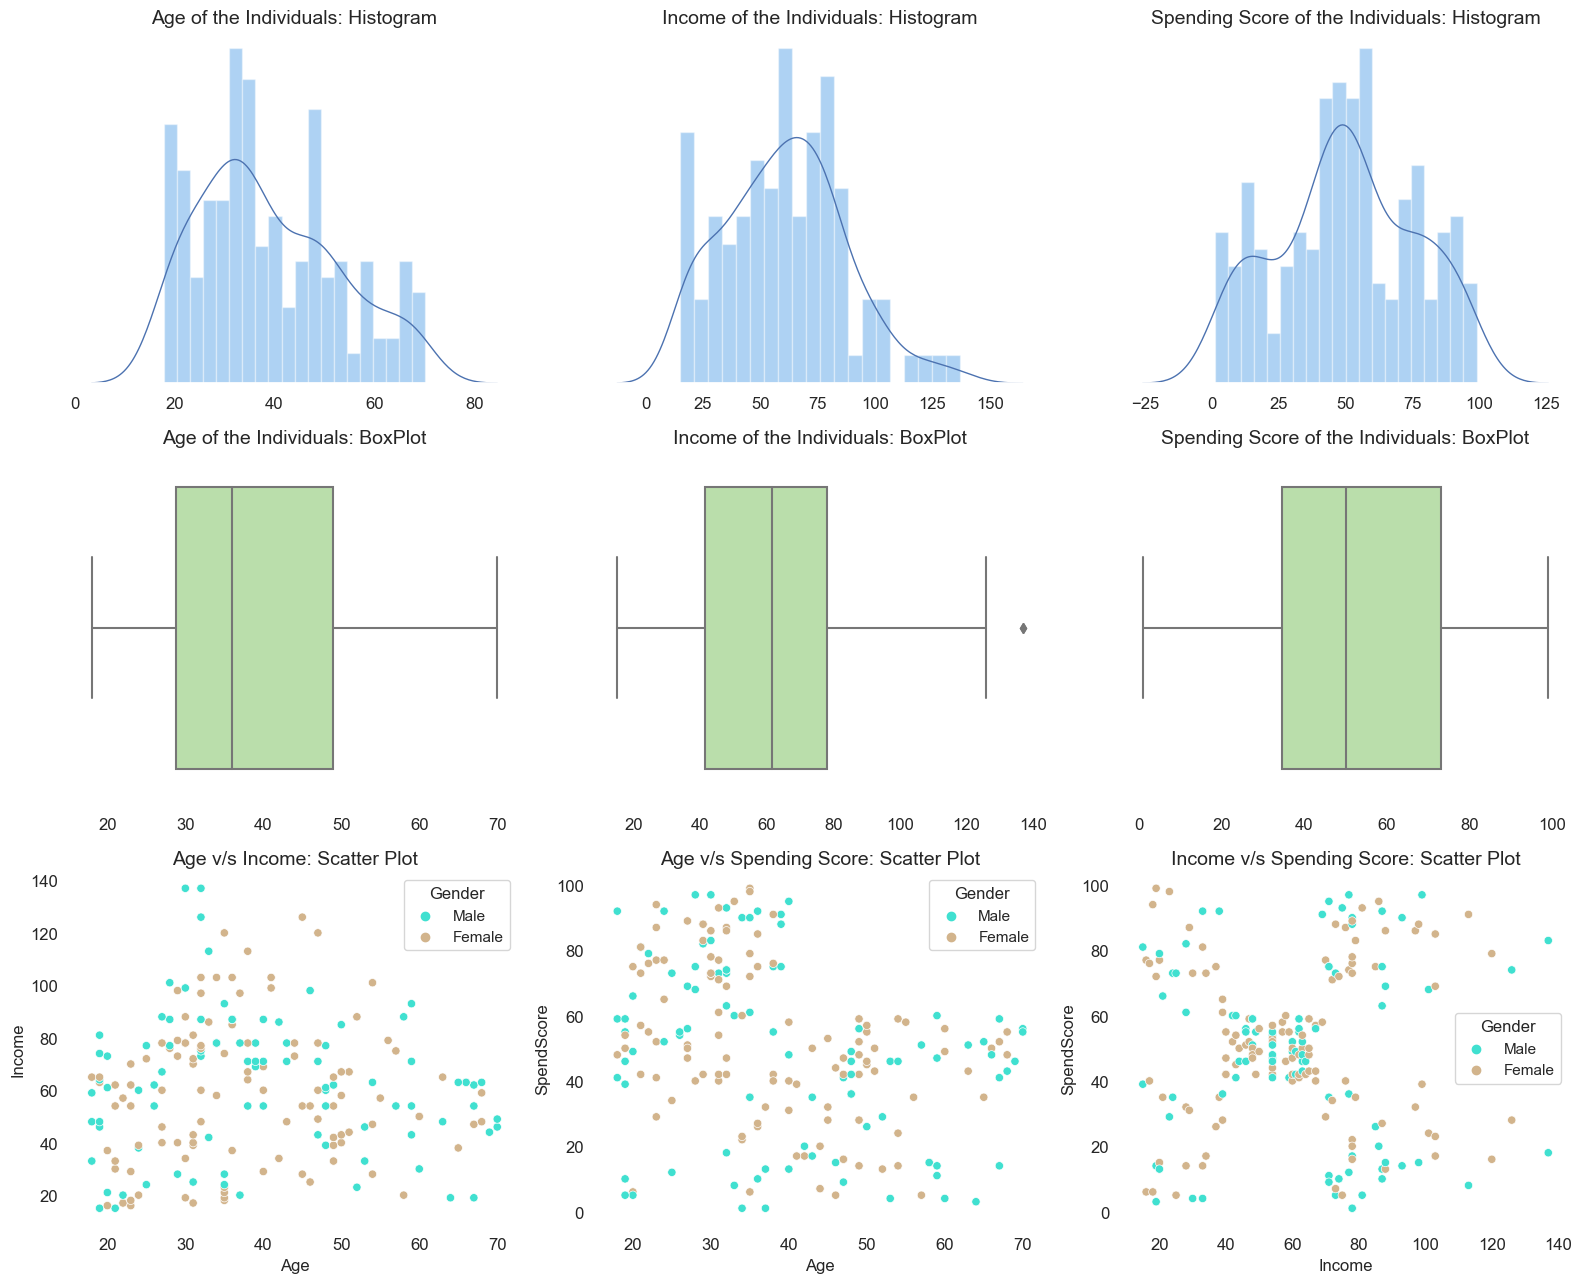

In [7]:
## Patterns & Trends in Numerical Variables:
### Age, Income & SpendScore are the three numerical variables.

plt.subplots(figsize = (16, 13))

plt.subplot(3, 3, 1)
plt.title('Age of the Individuals: Histogram', fontsize = 14)
sns.distplot(df['Age'], color = '#358fe2', bins = 20, kde_kws = {'linewidth': 1, 'color': 'b'})
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])

plt.subplot(3, 3, 2)
plt.title('Income of the Individuals: Histogram', fontsize = 14)
sns.distplot(df['Income'], color = '#358fe2', bins = 20, kde_kws = {'linewidth': 1, 'color': 'b'})
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])

plt.subplot(3, 3, 3)
plt.title('Spending Score of the Individuals: Histogram', fontsize = 14)
sns.distplot(df['SpendScore'], color = '#358fe2', bins = 20, kde_kws = {'linewidth': 1, 'color': 'b'})
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])

plt.subplot(3, 3, 4)
plt.title('Age of the Individuals: BoxPlot', fontsize = 14)
sns.boxplot(df['Age'], color = '#b7e7a2', orient = 'h')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3, 3, 5)
plt.title('Income of the Individuals: BoxPlot', fontsize = 14)
sns.boxplot(df['Income'], color = '#b7e7a2', orient = 'h')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3, 3, 6)
plt.title('Spending Score of the Individuals: BoxPlot', fontsize = 14)
sns.boxplot(df['SpendScore'], color = '#b7e7a2', orient = 'h')
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3, 3, 7)
plt.title('Age v/s Income: Scatter Plot', fontsize = 14)
sns.scatterplot(data=df, x = 'Age', y = 'Income', hue = 'Gender', palette = ('#40E0D0', '#D2B48C'), alpha = 1)

plt.subplot(3, 3, 8)
plt.title('Age v/s Spending Score: Scatter Plot', fontsize = 14)
sns.scatterplot(data=df, x = 'Age', y = 'SpendScore', hue = 'Gender', palette = ('#40E0D0', '#D2B48C'), alpha = 1)

plt.subplot(3, 3, 9)
plt.title('Income v/s Spending Score: Scatter Plot', fontsize = 14)
sns.scatterplot(data=df, x = 'Income', y = 'SpendScore', hue = 'Gender', palette = ('#40E0D0', '#D2B48C'), alpha = 1)

plt.show()

In [8]:
## K - Means Analysis:
## Start the analysis by creating a subset dataframe:
X = df[['Income', 'SpendScore']]
X.head()

,Income,SpendScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


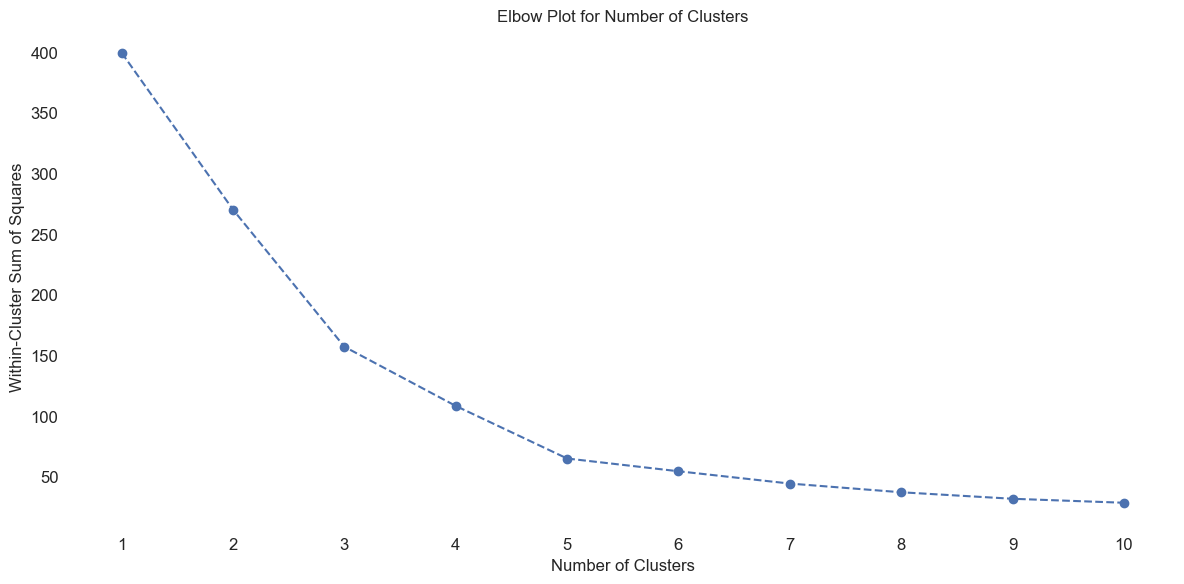

Knee is Located at:  5


In [9]:
## Scale the features & apply the elbow method to find out the number of clusters:
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(X)

# WCSS is the sum of the squared distance between each point and the centroid in a cluster. 
wcss = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)
# inertia_ = Sum of squared distances of samples to their closest cluster center, 
# weighted by the sample weights if provided.

plt.figure(figsize = (12, 6))
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Plot for Number of Clusters', fontsize = 12)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(range(1, 11))
plt.show()

## Identifying the Knee in the Elbow Plot:
kl = KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')
print('Knee is Located at: ', kl.elbow)

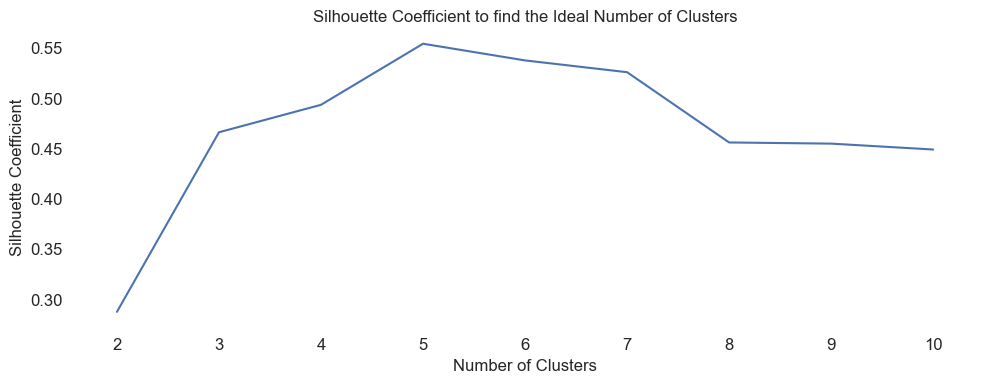

In [10]:
## Applying the Silhouette method to determine the number of clusters:
sil_coef = []
for cluster in range(2, 11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    sil_coef.append(score)

plt.figure(figsize = (10, 4))
plt.plot(range(2, 11), sil_coef)
plt.xticks(range(2, 11))
plt.title('Silhouette Coefficient to find the Ideal Number of Clusters', fontsize = 12)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

From the above graph, we conclude that 5 is the ideal number of clusters.

In [11]:
## Model fitting with 5 clusters:
clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)

df_K = df.copy()
df_K['Cluster'] = y_kmeans
df_K.head()

,Gender,Age,Income,SpendScore,Cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


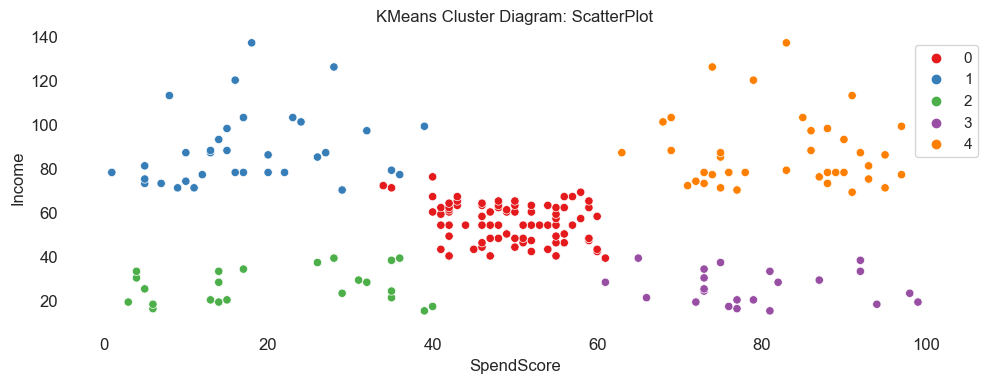

In [12]:
## ScatterPlot with Cluster Numbers:
plt.figure(figsize = (10, 4))
plt.title('KMeans Cluster Diagram: ScatterPlot', fontsize = 12)
sns.scatterplot(data = df_K, x = 'SpendScore', y = 'Income', hue = 'Cluster', palette = 'Set1')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'best', borderaxespad = 1)
plt.show()

---

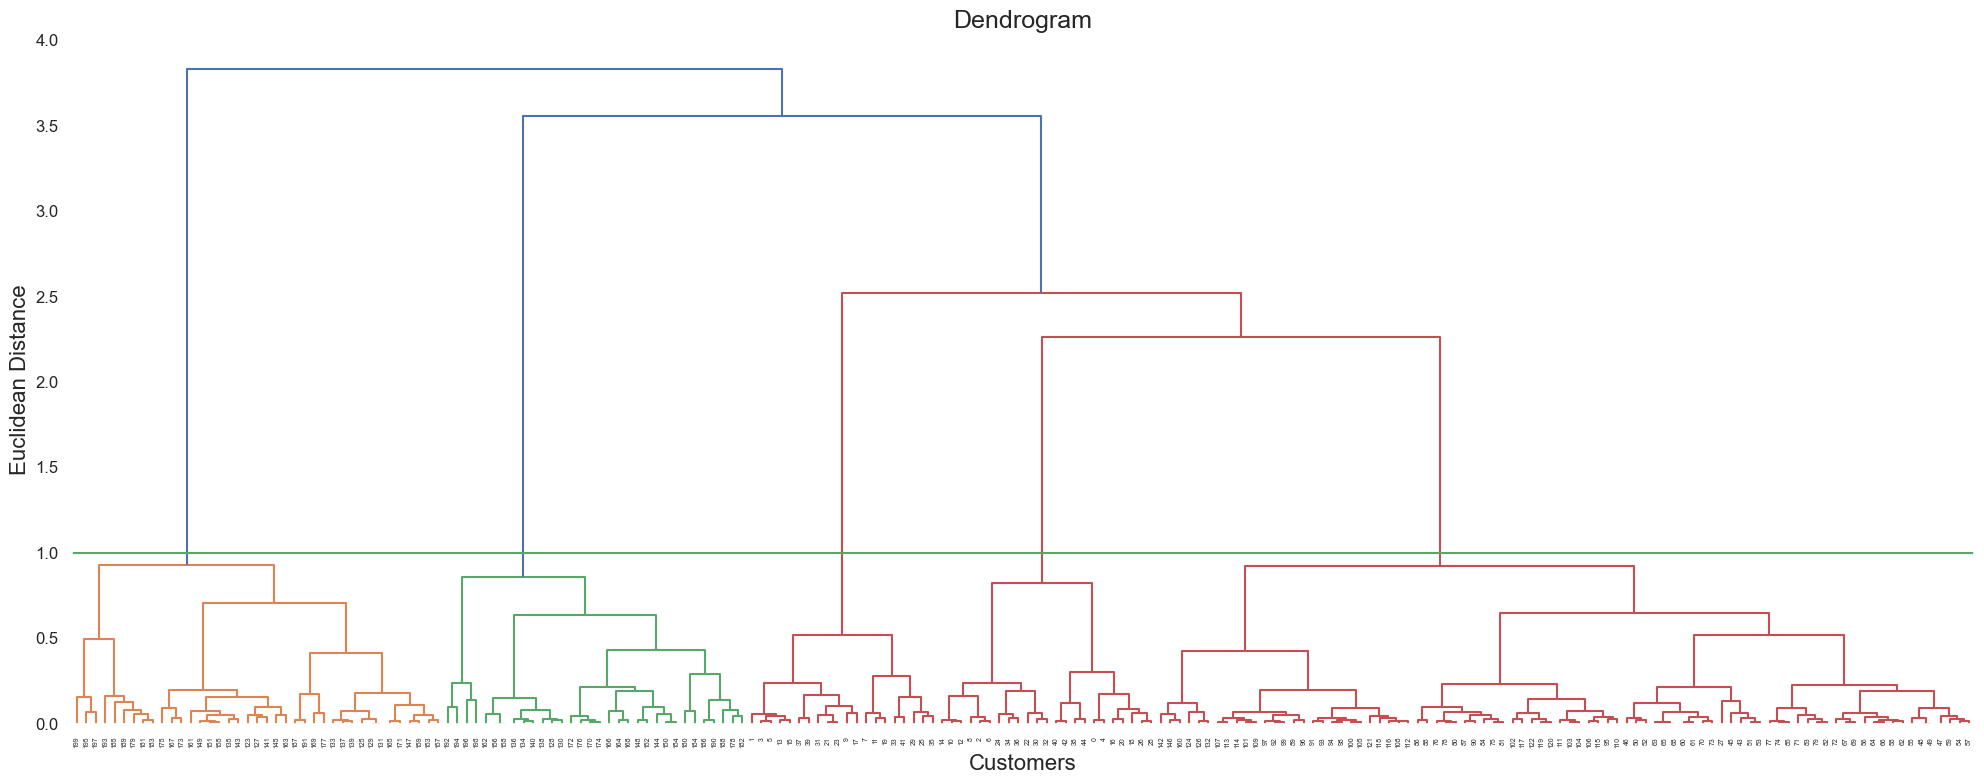

In [13]:
## Hierarchial Analysis:
norm = MinMaxScaler()
X_hierar = norm.fit_transform(X)
X_hierar = pd.DataFrame(X_hierar, columns = X.columns)

# Build Dendrogram to find out the Optimal Number of Clusters:
# Draw the threshold level to identify the Ideal Number of Clusters:
plt.figure(figsize = (20, 8))
dendrogram = shc.dendrogram(shc.linkage(X_hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g')
plt.title('Dendrogram', fontsize = 18)
plt.xlabel("Customers", fontsize = 16)
plt.ylabel('Euclidean Distance', fontsize = 16)
plt.show()

The threshold line intersects 5 vertical lines, hence we can conclude that the ideal number of clusters we can have as 5.

In [14]:
## Model fitting with 5 clusters:
clusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hierar = clusters.fit_predict(X_hierar)

df_H = df.copy()
df_H['Cluster'] = y_hierar
df_H.head()

,Gender,Age,Income,SpendScore,Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


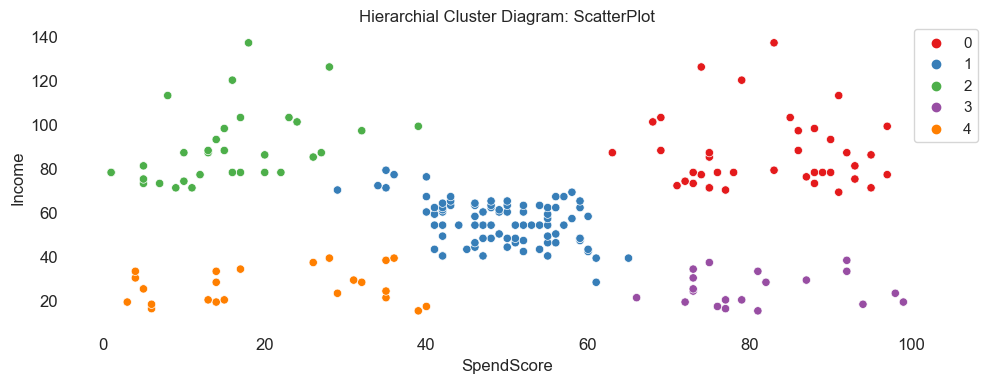

In [15]:
## ScatterPlot with Cluster Numbers:
plt.figure(figsize = (10, 4))
plt.title('Hierarchial Cluster Diagram: ScatterPlot', fontsize = 12)
sns.scatterplot(data = df_H, x = 'SpendScore', y = 'Income', hue = 'Cluster', palette = 'Set1')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'best', borderaxespad = 0)
plt.show()

---------

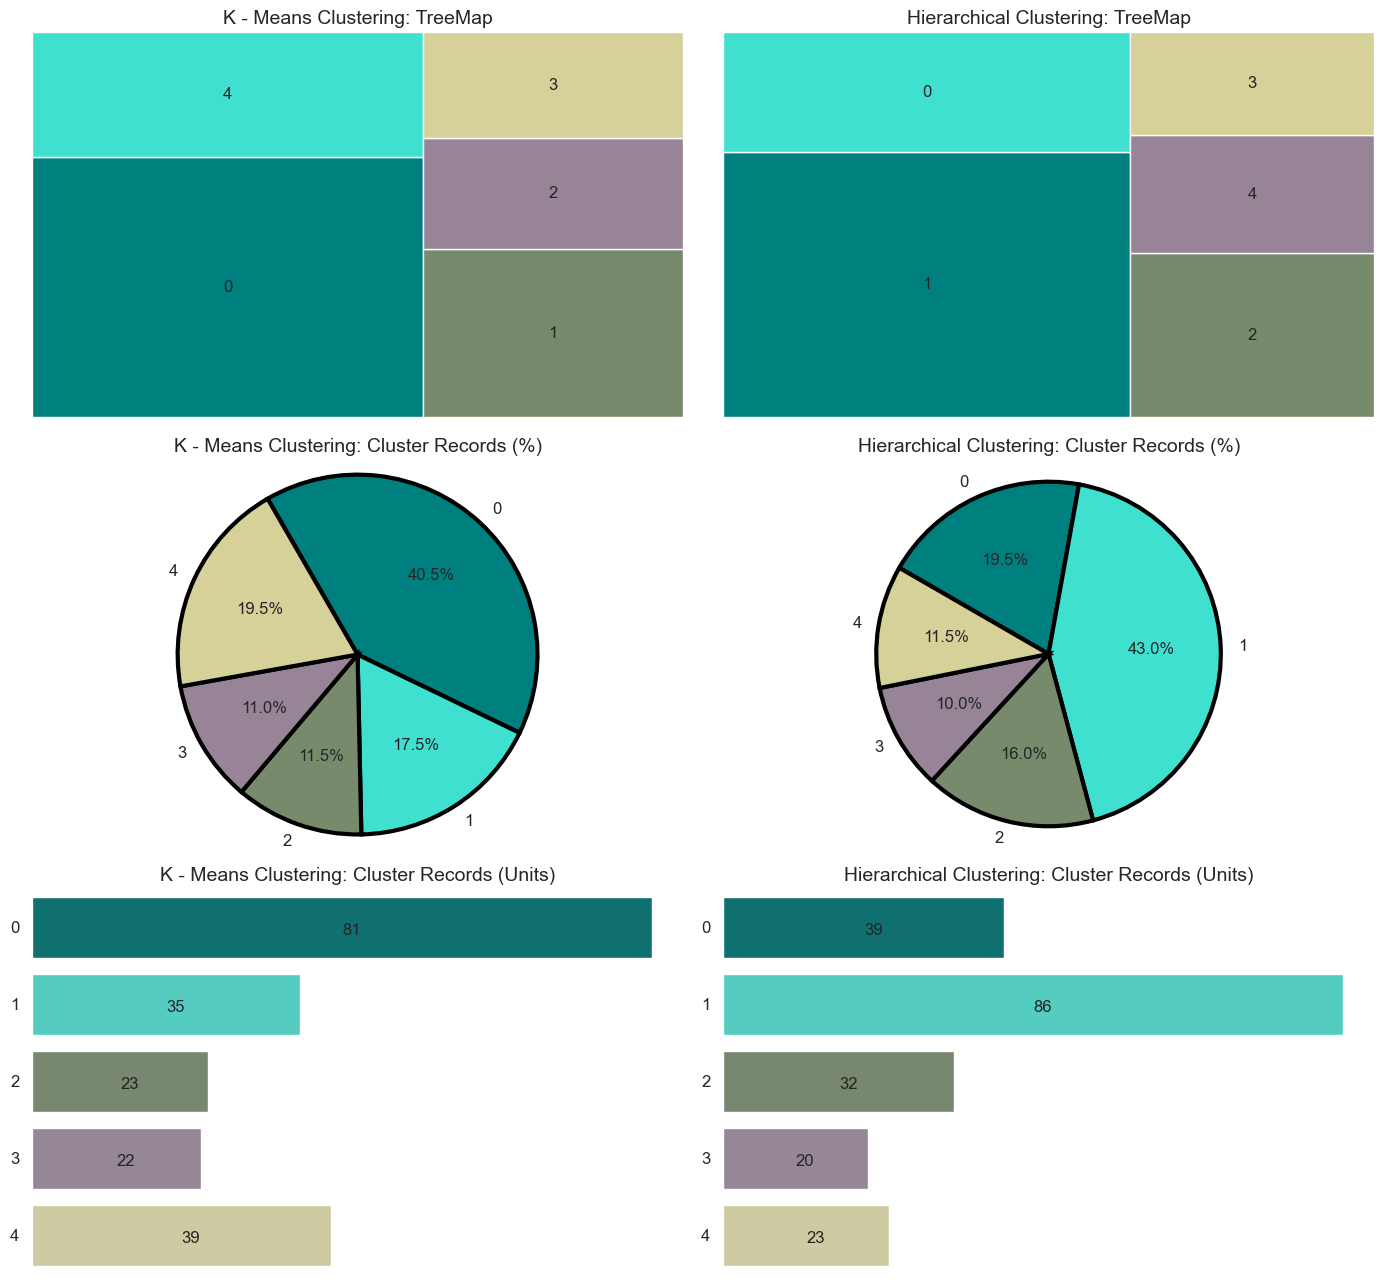

In [36]:
plt.subplots(figsize=(14,13))
my_pal = ('#007f7f','#40E0D0', '#778b6c', '#978597', '#d6d099')
my_col = ('#00C78C', '#bda27e', '#e5593f', '#386890','#e1e1bd')

plt.subplot(3, 2, 1)
plt.title('K - Means Clustering: TreeMap', fontsize = 14)
labels = df_K['Cluster'].value_counts().index.get_level_values(0).tolist()
sizes = df_K['Cluster'].value_counts().reset_index().Cluster.values.tolist()
squarify.plot(sizes = sizes, label = labels, color = my_pal)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Hierarchical Clustering: TreeMap', fontsize = 14)
labels = df_H['Cluster'].value_counts().index.get_level_values(0).tolist()
sizes = df_H['Cluster'].value_counts().reset_index().Cluster.values.tolist()
squarify.plot(sizes = sizes, label = labels, color = my_pal)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('K - Means Clustering: Cluster Records (%)', fontsize = 14)
sizes = df_K['Cluster'].value_counts().sort_index() / (df_K['Cluster'].value_counts().sum()*100)
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_pal, counterclock=False, startangle = 120, wedgeprops={'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.subplot(3, 2, 4)
plt.title('Hierarchical Clustering: Cluster Records (%)', fontsize = 14)
sizes = df_H['Cluster'].value_counts().sort_index() / (df_H['Cluster'].value_counts().sum()*100)
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_pal, counterclock=False, startangle = 150, wedgeprops={'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.subplot(3, 2, 5)
plt.title("K - Means Clustering: Cluster Records (Units)", fontsize = 14)
order = [0,1,2,3,4]
ax = sns.countplot(y = 'Cluster', data = df_K, palette = my_pal, order = order)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  ((p.get_x() + p.get_width() + 0.05)/2, p.get_y()+0.5))
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])

plt.subplot(3, 2, 6)
plt.title("Hierarchical Clustering: Cluster Records (Units)", fontsize = 14)
order = [0,1,2,3,4]
ax = sns.countplot(y = 'Cluster', data = df_H, palette = my_pal, order = order)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  ((p.get_x() + p.get_width() + 0.05)/2, p.get_y()+0.5))
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])

plt.show()

**Concluding Results:**
- Same number of clusters are identified using both KMeans & Hierarchical Clustering Methods.
- Even though the cluster number varies in each clustering technique, the size of the clusters (based on the location of the cluster on the scatter plot) almost matches in both the models.
- With regards to makeup of clusters, the clusters in both the KMeans & Hierarchial models reflect that low income customers are grouped into two segments, one who spend low & another who spend high.
- Similarly, the high income customers are also grouped into two broader segments, one who spend low and another who spend high.
- On the other hand, the middle income customers are predominantly segregated into a group that spends moderately, not high and not low.